In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tabulate import tabulate
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import cv2
import numpy as np

x_pixels = 60 # Change Approprietly - Ratio should be 3/2
y_pixels = 40
pixels_shape = x_pixels*y_pixels

data_dir = "/content/drive/MyDrive/ML_EXs_datasets/ML - Final"  # Replace with the actual path to your dataset folder

X = []  # List to store resized images
y = []  # List to store corresponding labels

for label, folder_name in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        for image_filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_filename)
            # Load and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (x_pixels, y_pixels))
            # Append the resized image to X
            X.append(image)
            # Append the corresponding label to y
            y.append(label)

# Convert X and y to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

In [3]:
# Create an empty array to store the grayscale images
X_gray = []

# Iterate through each image in X and convert it to grayscale
for image in X:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    X_gray.append(gray_image)

# Convert the list of grayscale images to a NumPy array
X_gray = np.array(X_gray)

# Check the shape of X_gray (it should be (2188, y_pixels, x_pixels))
print(X_gray.shape)

(2188, 20, 30)


In [4]:
# Normalize the pixel values to the range [0, 1]
X_normalized = X_gray / 255.0

# # Verify that the pixel values are now in the range [0, 1]
# min_pixel_value = np.min(X_normalized)
# max_pixel_value = np.max(X_normalized)
# print("Minimum pixel value:", min_pixel_value)
# print("Maximum pixel value:", max_pixel_value)

In [5]:
# Reshape X_normalized to (2188, 600)
X_reshaped = X_normalized.reshape(X_normalized.shape[0], -1)

# Check the shape of the resulting X_reshaped array
print("X_reshaped shape:", X_reshaped.shape)

X_reshaped shape: (2188, 600)


In [6]:
# Create a dictionary to map the old labels to the new labels
label_mapping = {0: 1, 1: 2, 2: 0}

# Use NumPy to apply the label transformation
y_transformed = np.vectorize(label_mapping.get)(y)

y =y_transformed

In [7]:
# Replace 'index_to_display' with the index of the image you want to display
index_to_display = 4

# Display the image at the specified index
cv2_imshow(X_gray[index_to_display])

In [8]:
y[index_to_display]

1

In [9]:
# Split the dataset into 80% training and 20% testing with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, stratify=y, random_state=0)

# Check the shapes of the resulting train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1750, 600)
X_test shape: (438, 600)
y_train shape: (1750,)
y_test shape: (438,)


In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)


In [11]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
y_pred = rf_classifier.predict(X_test)

In [13]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 90.64%


# Game on

In [14]:
import numpy as np
import random
import cv2
from sklearn.metrics import accuracy_score

N = 1000  # Number of turns
p1 = 0.5  # Probability of applying vertical flip
p2 = 0.5  # Probability of applying horizontal flip
sigma = 0.05  # Standard deviation for adding noise

profit = 0

In [15]:
game_accuracy = []
profits_over_time = []

In [16]:
for _ in range(N):
    # Randomly select an image from the combined dataset (X_train and X_test)
    #combined_dataset = np.concatenate((X_train, X_test), axis=0)
    random_index = random.randint(0, X_train.shape[0] - 1) # or combined_dataset
    selected_image = X_train[random_index]        # or combined_dataset

    # Apply vertical flip with probability p1
    if random.random() < p1:
        selected_image = cv2.flip(selected_image, 0)

    # Apply horizontal flip with probability p2
    if random.random() < p2:
        selected_image = cv2.flip(selected_image, 1)

    # Add noise with mean 0 and standard deviation sigma
    noise = np.random.normal(0, sigma, selected_image.shape).astype(np.float32)
    noisy_image = selected_image + noise

    # Reshape the image to match the model's input shape
    noisy_image = noisy_image.reshape(1, pixels_shape)

    # Make predictions using the trained model
    predictions = rf_classifier.predict(noisy_image)

    # Get the predicted class (index with the highest probability)
    predicted_class = np.argmax(predictions)

    # Calculate the true label (y) of the selected image
    if random_index < X_train.shape[0]:
        true_label = y_train[random_index]
    else:
        true_label = y_test[random_index - X_train.shape[0]]

    # Check if the prediction is correct and update game_accuracy
    is_correct = (predicted_class == true_label)
    game_accuracy.append(is_correct)

       # Check if the prediction is correct and update profit
    if is_correct:
        profit += 1
    else:
        profit -= 1

    # Append the current profit to the profits_over_time list
    profits_over_time.append(profit)

In [17]:
final_accuracy = np.mean(game_accuracy)
print(f"Game Accuracy: {final_accuracy * 100:.2f}%")

Game Accuracy: 32.90%


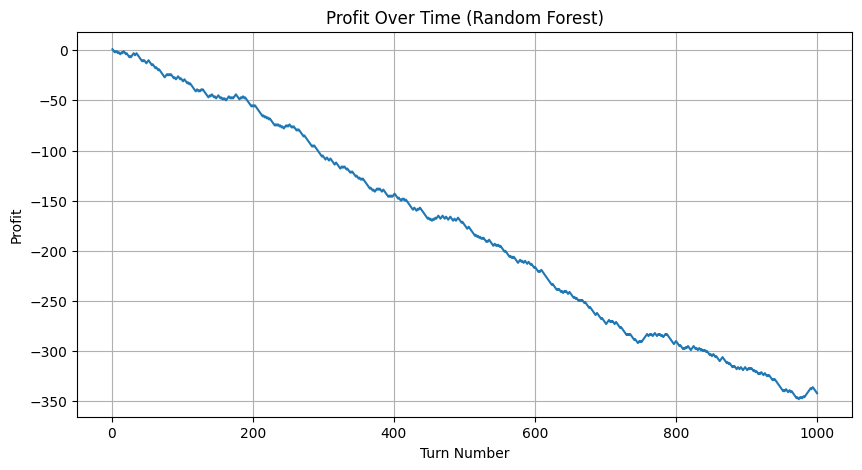

In [18]:
# Create a list of turn numbers from 1 to N
turn_numbers = list(range(1, N + 1))

# Plot the profit over time
plt.figure(figsize=(10, 5))
plt.plot(turn_numbers, profits_over_time)
plt.xlabel("Turn Number")
plt.ylabel("Profit")
plt.title("Profit Over Time (Random Forest)")
plt.grid(True)
plt.show()